In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=ffc22627c9b7eb7e22fd253177f9dfb659c18703a4c7aa9d3bc5b4033502b9e2
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
from datetime import datetime
import glob
import cv2
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow

def load_and_encode_faces(*image_paths):
    face_encodings = []

    for path in image_paths:
        face_image = face_recognition.load_image_file(path)
        encoding = face_recognition.face_encodings(face_image)[0]
        face_encodings.append(encoding)

    return face_encodings

def create_known_faces(known_face_names, *image_paths):
    face_encodings = load_and_encode_faces(*image_paths)
    known_faces = dict(zip(known_face_names, face_encodings))
    return known_faces

def makeAttendanceEntry(name):
    with open('attendance_list.csv', 'a+') as FILE:
        FILE.seek(0)
        allLines = FILE.readlines()

        attendanceList = [line.split(',')[0].strip() for line in allLines]

        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            FILE.write(f'\n{name},{dtString}')



directory_path = "/content/drive/MyDrive/all images/"
image_paths = glob.glob(directory_path + "*.jpg")

known_face_names = [
    "Virat Kohli",
    "Osho",
    "Shreya",
    "Hema"
    ]

known_faces = create_known_faces(known_face_names, *image_paths)
print("Done learning and creating profiles")




Done learning and creating profiles


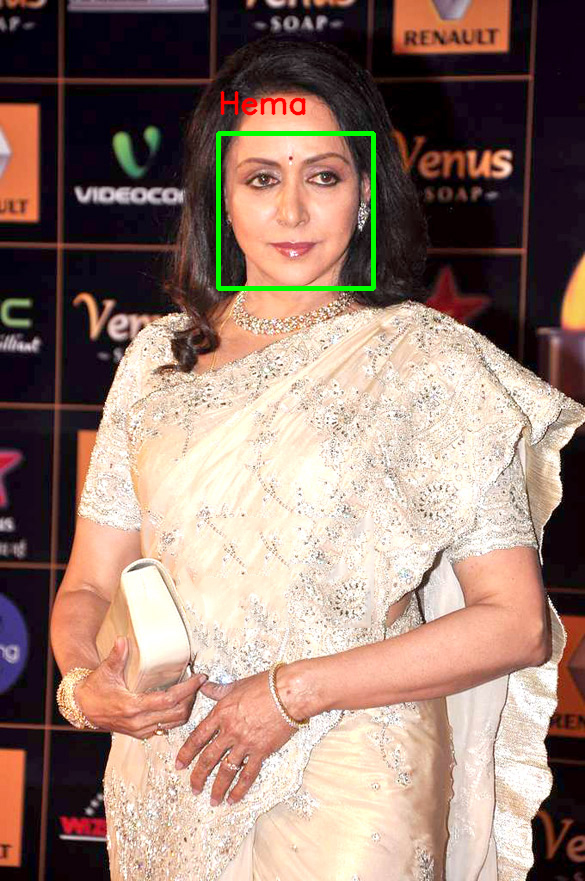

In [ ]:
file_name = "/content/hematest.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(list(known_faces.values()), face_encoding)

    name = "Unknown"
    if True in matches:
        first_match_index = matches.index(True)
        name = list(known_faces.keys())[first_match_index]

    cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom), (0, 255, 0), 3)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw, name, (left, top - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    makeAttendanceEntry(name)

cv2_imshow(unknown_image_to_draw)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
